# English Words in TensorFlow

### Generating English-like Words
I want to create a game where I present the user with a string of characters and the user has to guess whether the word is a genuine English word or something that was made up. For this to work, I need to find a way to generate realistic word-like character strings. To achieve this I'm going to try a ML technology call Generative Adversarial Networks (GAN):
  
  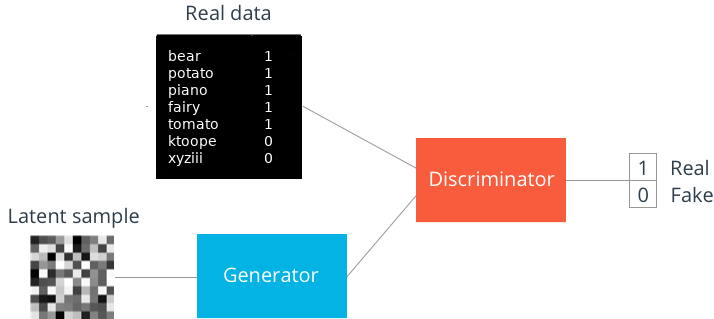

*(image adapted fromborrowed from [this website](https://miro.medium.com/))*

### Jupyter Notebooks, Colab & TensorFlow
This demonstration uses Colab which is an online service offered by Google. It uses a slightly modified version of Jupyter Notebooks. 

Alternative Jupyter Notebook ML environments include [Kaggle](https://kaggle.com/) and [Azure Notebooks](https://notebooks.azure.com).

### STEP 1: Importing Libraries
By default, Colabs uses TensorFlow 1. To use TensorFlow 2 we need to execute a bit of special code before importing the library. To execute code in a Colabs environment we just write it in a cell and execute it:

In [1]:
import dill
import gzip
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import string
%tensorflow_version 2.x
import tensorflow as tf

np.set_printoptions(edgeitems=30, linewidth=10000, 
    formatter=dict(float=lambda x: "%.3g" % x))

TensorFlow 2.x selected.


### STEP 2: Loading Dataset & Encode/Decode Functions from Google Cloud Storage

As this is quite a short session, I have preprepared a dataset with over a million words, as well as functions that encode and decode arbitrary lists of words into the same format. I serialised these items using a package called `dill` and put them in a Google Storage Bucket. I'll load them back in here.

In [2]:
def download_file(local_basename, remote_filename):
    baseurl = 'https://storage.googleapis.com/files.mxklabs.co.uk/machine-learning/english-words/'
    return tf.keras.utils.get_file(local_basename, baseurl + remote_filename)

def load_python_object_from_filename(filename):
    with gzip.open(filename, 'rb') as file:
        return dill.load(file)

encode = load_python_object_from_filename(download_file('encode', 'to_recur_onehot20.dill.gz'))
decode = load_python_object_from_filename(download_file('decode', 'from_recur_onehot20.dill.gz'))
dataset = load_python_object_from_filename(download_file('dataset', 'dataset_recur_onehot20.dill.gz'))

44720128/44717521 [==============================] - 1s 0us/step


### STEP 3: Show Me The Data!

In [0]:
print(f'x.shape={dataset.train.x.shape}')
print(f'y.shape={dataset.train.y.shape}')

x.shape=(521863, 21, 27)
y.shape=(521863, 1)


In [0]:
x_subset = dataset.train.x[29:30,:,:]
y_subset = dataset.train.y[29:30,:]

print("   " + " ".join(string.ascii_uppercase))
print(x_subset)
print(f'Word: {decode(x_subset)} -> {y_subset[0]}')

   A B C D E F G H I J K L M N O P Q R S T U V W X Y Z
[[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 1 0 0 0 0 0 

In [0]:
x_subset = dataset.train.x[65:66,:,:]
y_subset = dataset.train.y[65:66,:]

print("   " + " ".join(string.ascii_uppercase))
print(x_subset)
print(f'Word: {decode(x_subset)} -> {y_subset[0]}')

   A B C D E F G H I J K L M N O P Q R S T U V W X Y Z
[[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
  [0 0 0 0 0 0 0 

### STEP 4: Keras / TensorFlow model
Keras is a high-level API for machine learning. TensorFlow is one of the low-level computational frameworks that Keras supports. Definine a neural network is just a few lines of code:

In [0]:
def to_batched_data_subset(x, y, batch_size=500, prefetch=10):
    result = tf.data.Dataset.from_tensor_slices((x, y))
    return result.batch(batch_size).prefetch(prefetch) 

In [0]:
# Define a model.
discriminator = tf.keras.models.Sequential(name='discriminator')
discriminator.add(tf.keras.layers.LSTM(name='dlstm', units=500, use_bias=True, activation='tanh', input_shape=dataset.train.x[0].shape))
discriminator.add(tf.keras.layers.Dense(name='dhidden1', units=100, use_bias=True, activation='tanh'))
discriminator.add(tf.keras.layers.Dense(name='dhidden2', units=10, use_bias=True, activation='tanh'))
discriminator.add(tf.keras.layers.Dense(name='doutput', units=1, use_bias=True, activation='linear'))

# Compile it.
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
discriminator.compile(optimizer=opt, loss='binary_crossentropy', metrics=['binary_accuracy'])

# Train it.
discriminator.fit(to_batched_data_subset(dataset.train.x, dataset.train.y, batch_size=500), 
          validation_data=to_batched_data_subset(dataset.val.x, dataset.val.y), 
          validation_steps=20, verbose=1, epochs=120,
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)])


Train for 1044 steps, validate for 20 steps
Epoch 1/120
1044/1044 [==============================] - 28s 27ms/step - loss: 0.3049 - binary_accuracy: 0.8945 - val_loss: 0.2023 - val_binary_accuracy: 0.9312
Epoch 2/120
1044/1044 [==============================] - 20s 19ms/step - loss: 0.2096 - binary_accuracy: 0.9331 - val_loss: 0.1960 - val_binary_accuracy: 0.9327
Epoch 3/120
1044/1044 [==============================] - 20s 19ms/step - loss: 0.2240 - binary_accuracy: 0.9274 - val_loss: 0.1781 - val_binary_accuracy: 0.9399
Epoch 4/120
1044/1044 [==============================] - 20s 19ms/step - loss: 0.2061 - binary_accuracy: 0.9311 - val_loss: 0.1712 - val_binary_accuracy: 0.9406
Epoch 5/120
1044/1044 [==============================] - 20s 19ms/step - loss: 0.2162 - binary_accuracy: 0.9293 - val_loss: 0.1704 - val_binary_accuracy: 0.9377
Epoch 6/120
1044/1044 [==============================] - 20s 19ms/step - loss: 0.2561 - binary_accuracy: 0.9032 - val_loss: 0.2119 - val_binary_accurac

### STEP 4 (shortcut): Here's One I Cooked Earlier

In [0]:
discriminator = tf.keras.models.load_model(download_file('model', 'model.h5'))

13328384/13325864 [==============================] - 0s 0us/step


### STEP 5: Sanity Checking

Let's first confirm that our model's performance on the validation set is what we expect.

In [0]:
pred_y   = (discriminator.predict(dataset.val.x) > 0.5)
actual_y = (dataset.val.y == 1)

accuracy = float (sum(pred_y == actual_y)) / dataset.val.y.size
print(f'Accuracy: {accuracy*100:.03f}%')

Accuracy: 98.441%


Let's see what kind of scores our model is actually giving the 'words' in the validation set.

Text(0.5, 1.0, 'Words')

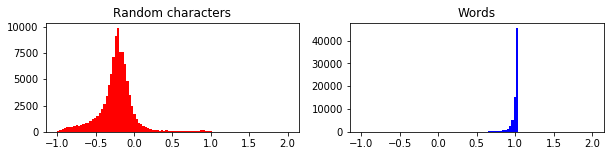

In [0]:
rand_pred_y = discriminator.predict(dataset.val.x[dataset.val.y[:,0] == 0]).ravel()
word_pred_y = discriminator.predict(dataset.val.x[dataset.val.y[:,0] == 1]).ravel()

fig, axs = plt.subplots(1, 2,figsize=(10,2))
axs[0].hist(rand_pred_y, bins=100, range=(-1,2), color='red')
axs[0].set_title('Random characters')
axs[1].hist(word_pred_y, bins=100, range=(-1,2), color='blue')
axs[1].set_title('Words')

Finally, lets try our model on some words we came up with.

In [0]:
test_words = ['cat', 'floop', 'floegh', 'dog', 'doog', 'dooog', 'tsookdo', 'iwckdj']
test_words_x = encode(test_words)
test_words_pred_y = discriminator.predict(test_words_x)

pd.concat([
    pd.DataFrame(test_words, columns=['test_word']),
    pd.DataFrame(test_words_pred_y, columns=['score'])], axis=1)

,test_word,score
0,cat,0.732574
1,floop,0.856810
2,floegh,0.908125
3,dog,0.601068
4,doog,0.655623
5,dooog,0.258679
6,tsookdo,-0.061626
7,iwckdj,-0.118463


### STEP 6: Let's Generate Fake Words!
Let's create another neural network which maps vectors of random numbers to character sequence that get a high score on our model. This is called a GAN and it's frequently used in machine learning to generate real-looking information (think: deep fakes).

A problem we have is that the generator generates tensors that don't match the constraints of our word encoding in that individual letter vectors have numbers rather than a one-hot encoding. Our discriminstator was not trained on this kind of input so it likely won't distinguish words based very accurately. Ideally we want to do do a transformation where only the column with the highest number has a 1 and everything else is 0, but operations like argmax are not differentiable and backpropagation would not work back to the generator.







We need to understand the Gumbel softmax trick - why.



In [0]:
latent_dim = 10
num_samples = 5000
batch_size = 500

class GumbalSoftmaxTrick(tf.keras.layers.Layer):
  def __init__(self, axis=-1, temperature=0.2, **kwargs):
    super(GumbalSoftmaxTrick, self).__init__(**kwargs)
    self.supports_masking = True
    self.axis = axis
    self.temperature = temperature

  @staticmethod
  def sample_gumbel(shape, eps=1e-20):
    U = tf.random.uniform(shape,minval=0,maxval=1)
    return -tf.math.log(-tf.math.log(U + eps) + eps)

  #def gumbel_softmax_sample(logits, temperature): 
  #  """ Draw a sample from the Gumbel-Softmax distribution"""
  #  y = logits + sample_gumbel(tf.shape(logits))
  #  return tf.nn.softmax( y / temperature)

    #y = gumbel_softmax_sample(logits, temperature)
    #if hard:
    #  k = tf.shape(logits)[-1]
    #  #y_hard = tf.cast(tf.one_hot(tf.argmax(y,1),k), y.dtype)
    #  y_hard = tf.cast(tf.equal(y,tf.reduce_max(y,1,keep_dims=True)),y.dtype)
    #  y = tf.stop_gradient(y_hard - y) + y
    #return y


  def call(self, inputs):
    #print(inputs)
    y = inputs + GumbalSoftmaxTrick.sample_gumbel(tf.shape(inputs))
    return tf.keras.backend.softmax(y / self.temperature, axis=self.axis)
    #.return tf.keras.backend.softmax(inputs, axis=self.axis)
    # return tf.keras.backend.softmax(inputs, axis=self.axis)

  def get_config(self):
    config = {'axis': self.axis}
    config = {'temperature': self.temperature}
    base_config = super(GumbalSoftmaxTrick, self).get_config()
    return dict(list(base_config.items()) + list(config.items()))

  def compute_output_shape(self, input_shape):
    return input_shape



#print(sample_gumbel(shape=(10,)))

# Define a model.
# TODO: Consider using BatchNormalisation (BatchNormalization(momentum=0.8))
latent_space = tf.keras.layers.Input(shape=(latent_dim,))

generator = tf.keras.models.Sequential(name="generator")
generator.add(tf.keras.layers.Dense(name='ghidden1', units=500, use_bias=True, activation='tanh', input_dim=latent_dim))
generator.add(tf.keras.layers.Dense(name='ghidden2', units=1000, use_bias=True, activation='tanh'))
generator.add(tf.keras.layers.Dense(name='ghidden3', units=np.prod(dataset.train.x[0].shape), use_bias=True))
generator.add(tf.keras.layers.Reshape(dataset.train.x[0].shape))
# TODO: Learn Gumbel Softmax trick, https://blog.evjang.com/2016/11/tutorial-categorical-variational.html
generator.add(GumbalSoftmaxTrick(axis=-1, temperature=0.8))

#discriminator = tf.keras.models.clone_model(discriminator)
#discriminator.set_weights(discriminator.get_weights())
discriminator.trainable = False

combined = tf.keras.models.Model(latent_space, discriminator(generator(latent_space)))

# Compile it.
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
combined.compile(loss='binary_crossentropy', optimizer=opt)

# Train it.
combined_train_x = np.random.normal(0, 1, (num_samples, latent_dim))
combined_train_y = np.ones((num_samples, 1))
combined_val_x = np.random.normal(0, 1, (num_samples, latent_dim))
combined_val_y = np.ones((num_samples, 1))

Train for 10 steps, validate for 10.0 steps
Epoch 1/100
10/10 [==============================] - 1s 142ms/step - loss: 15.4249 - val_loss: 15.4230
Epoch 2/100
10/10 [==============================] - 0s 36ms/step - loss: 15.4249 - val_loss: 15.4249
Epoch 3/100
10/10 [==============================] - 0s 35ms/step - loss: 15.4222 - val_loss: 15.4249
Epoch 4/100
10/10 [==============================] - 0s 36ms/step - loss: 15.4249 - val_loss: 15.4249
Epoch 5/100
10/10 [==============================] - 0s 38ms/step - loss: 15.4249 - val_loss: 15.4201
Epoch 6/100
10/10 [==============================] - 0s 35ms/step - loss: 15.4249 - val_loss: 15.4249
Epoch 7/100
10/10 [==============================] - 0s 36ms/step - loss: 15.4249 - val_loss: 15.4249
Epoch 8/100
10/10 [==============================] - 0s 35ms/step - loss: 15.4249 - val_loss: 15.4249
Epoch 9/100
10/10 [==============================] - 0s 34ms/step - loss: 15.4223 - val_loss: 15.4249
Epoch 10/100
10/10 [=================

In [0]:
generator.layers[4]

In [0]:

combined.fit(to_batched_data_subset(combined_train_x, combined_train_y, batch_size),
    validation_data=to_batched_data_subset(combined_val_x, combined_val_y, batch_size), 
    validation_steps=num_samples/batch_size, verbose=1, epochs=100,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)])

Train for 10 steps, validate for 10.0 steps
Epoch 1/100
10/10 [==============================] - 0s 40ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 2/100
10/10 [==============================] - 0s 38ms/step - loss: 3.3079e-04 - val_loss: 3.4512e-04
Epoch 3/100
10/10 [==============================] - 0s 37ms/step - loss: 0.0031 - val_loss: 0.0065
Epoch 4/100
10/10 [==============================] - 0s 39ms/step - loss: 0.0063 - val_loss: 0.0064
Epoch 5/100
10/10 [==============================] - 0s 38ms/step - loss: 3.5668e-05 - val_loss: 0.0032
Epoch 6/100
10/10 [==============================] - 0s 38ms/step - loss: 0.0062 - val_loss: 0.0038
Epoch 7/100
10/10 [==============================] - 0s 37ms/step - loss: 4.2560e-04 - val_loss: 1.5111e-04
Epoch 8/100
10/10 [==============================] - 0s 36ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 9/100
10/10 [==============================] - 0s 37ms/step - loss: 0.0033 - val_loss: 6.3468e-04
Epoch 10/100
10/10 [============

In [0]:
def to_words(prediction):
    #print(prediction)
    argmax = np.argmax(prediction, axis=-1)
    #print(argmax)
    as_x = np.zeros(argmax.shape + (27,))
    for w in range(argmax.shape[0]):
        as_x[w, np.arange(argmax.shape[1]), argmax[w]] = 1
    #as_x[np.arange(argmax.shape[0]), np.arange(argmax.shape[1]), argmax] = 1
    #print(as_x)
    return decode(as_x)

generator_out = generator.predict(np.random.normal(0, 1, (20, latent_dim)))
blah = to_words(generator_out)
#print([len(w) for w in blah])
print(blah)

['soerleroororoioieiaee', 'roeoeoroarooelleeieie', 'reoreoreioeoaaeierees', 'iloreroooroolirieiiie', 'reeriirooroollleerlee', 'roereoroorooeeleeieee', 'iooreoreaioroelieoiie', 'roerooroororlaleeroes', 'aoeritrooroolilieiaes', 'aoereeroirootalieilie', 'rueriertoroalloeriaee', 'aeerioroorooerlieiiae', 'roooetroororoeleieiee', 'roureorooroeillieolee', 'reerearoirroleaieieis', 'rooooaroerrleilieeeee', 'teorrorioroooilieolee', 'eooretroorooeeliiieae', 'roerooroorerolleeioee', 'teorreroorerlileeieee']


In [0]:
generator.predict(np.random.normal(0, 1, (1, latent_dim)))

array([[[0.00651, 0.00374, 0.017, 1.19e-05, 0.00659, 4.57e-07, 8.19e-07, 0.00145, 0.0044, 7.73e-06, 8.56e-06, 0.00107, 2.3e-05, 0.000159, 0.136, 0.0019, 7.13e-08, 0.748, 0.00586, 0.0583, 0.00216, 2.8e-06, 2.89e-08, 3.09e-07, 1.36e-05, 1.64e-05, 0.00733],
        [0.011, 5.17e-06, 0.000161, 3.31e-06, 0.0238, 0.000112, 2.3e-05, 0.000395, 0.00612, 5.95e-08, 9.44e-08, 0.00135, 9.25e-06, 0.000633, 0.937, 5.41e-05, 7.61e-09, 0.00658, 0.000489, 0.00282, 0.00679, 4.7e-07, 6.25e-07, 1.78e-08, 1.92e-05, 7.52e-07, 0.0024],
        [0.00945, 6.42e-06, 0.0325, 0.00061, 0.407, 7.19e-08, 4.45e-06, 0.000687, 0.0979, 1.55e-05, 1.39e-05, 0.00756, 5.54e-05, 0.0008, 0.406, 0.000103, 3.43e-07, 0.00375, 0.00107, 0.0288, 0.00273, 5.5e-07, 8.28e-07, 6.79e-05, 0.000182, 1.02e-07, 0.000376],
        [0.000876, 2e-07, 6.26e-06, 1.65e-05, 0.00113, 3.63e-09, 4.93e-07, 1.95e-05, 0.000337, 2.13e-09, 2.78e-09, 0.000255, 1.78e-06, 0.00011, 0.00839, 9.5e-07, 1.5e-08, 0.987, 0.000273, 0.00105, 0.000323, 9.07e-09, 4.15e-

In [0]:
import google.colab
import os

# Work out some directories.
gdrive_dir = '/content/gdrive'
google.colab.drive.flush_and_unmount()
google.colab.drive.mount(gdrive_dir)
base_dir = os.path.join(gdrive_dir, 'My Drive', 'Colab Notebooks', 'ml', 'playground', 'english_words', 'english_words_demo')
model_filename = os.path.join(base_dir, 'model.h5')

# Make sure some directories exist.
os.makedirs(base_dir, exist_ok=True)

Mounted at /content/gdrive


In [0]:
model.save(model_filename)

In [0]:
!ls /content/gdrive/My\ Drive/Colab\ Notebooks/ml/playground/english_words

english_words_demo


In [0]:
model = tf.keras.models.load_model(model_filename)

**Questions**:

* To train a model to detect English words we need some training data that isn't English words. What kind of data should we use? How do we get it?
* What kind of network is best suited to learn words? What method of turning words into tensors is best suited to ML?